In [1]:
from google.colab import files
uploaded = files.upload()


Saving brain-tumor-mri-dataset.zip to brain-tumor-mri-dataset.zip


In [2]:
!pip install tensorflow==2.12.0 numpy==1.24.3 pandas==2.0.1 matplotlib==3.7.1 seaborn==0.12.2

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install numpy==1.24.3 and tensorflow==2.12.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested numpy==1.24.3
    tensorflow 2.12.0 depends on numpy<1.24 and >=1.22

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
# Define paths to the data directories
train_dir = '/content/brain_tumor_mri_dataset/brain-tumor-mri-dataset/Testing'
test_dir = '/content/brain_tumor_mri_dataset/brain-tumor-mri-dataset/Testing'

In [ ]:
# Preprocessing steps (example - adjust as needed)
IMG_WIDTH = 128
IMG_HEIGHT = 128

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    image /= 255.0  # Normalize pixel values
    return image


In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.list_files(train_dir + '/*/*')
train_dataset = train_dataset.map(preprocess_image)

test_dataset = tf.data.Dataset.list_files(test_dir + '/*/*')
test_dataset = test_dataset.map(preprocess_image)

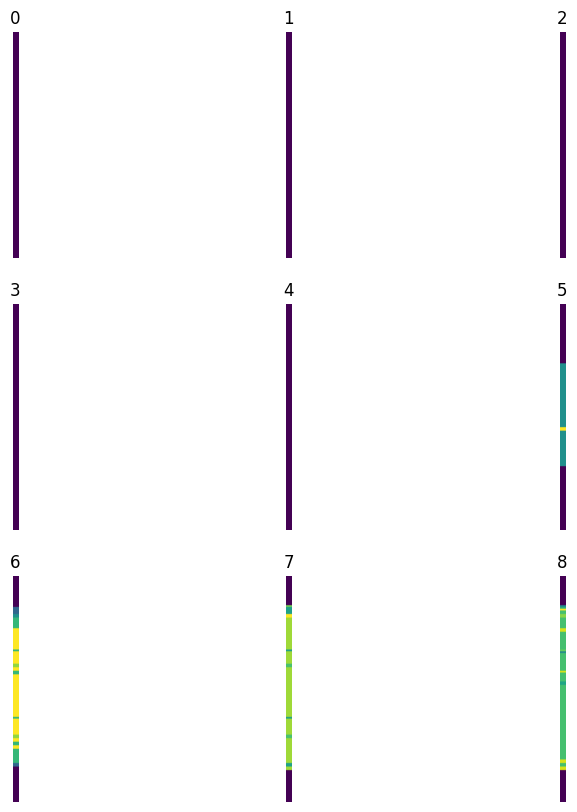

In [ ]:
#3
import matplotlib.pyplot as plt

# Display a few sample images
plt.figure(figsize=(10, 10))
for images in train_dataset.take(1): # Take 1 batch from the dataset
  for i in range(9): # Display 9 images from this batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy()) # images[i] is a tensor, convert it to numpy array for display
    plt.title(str(i)) # Set title for each subplot
    plt.axis("off") # Remove axis ticks and labels

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=32,
    class_mode='categorical'
)

Found 23 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Assuming 4 tumor classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30, # Adjust as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3043 - loss: 1.3560 - val_accuracy: 0.6087 - val_loss: 1.2219
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3478 - loss: 1.3155 - val_accuracy: 0.7391 - val_loss: 1.1760
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4348 - loss: 1.2643 - val_accuracy: 0.5652 - val_loss: 1.1006
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3043 - loss: 1.3754 - val_accuracy: 0.4783 - val_loss: 1.0876
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step - accuracy: 0.2174 - loss: 1.3458 - val_accuracy: 0.6087 - val_loss: 1.0767
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4783 - loss: 1.2035 - val_accuracy: 0.6087 - val_loss: 1.0276
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.5217 - loss: 1.2265 - val_accuracy: 0.6957 - val_loss: 0.9803
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step - accuracy: 0.5217 - loss: 1.0871 - val_accuracy: 0.6957 - val_loss: 0.9615
Epoch 9

In [ ]:
# Assuming 'history' is the variable storing the training history
accuracy = history.history['accuracy'][-1]  # Get accuracy from the last epoch
print(f'Accuracy: {accuracy}')

Accuracy: 0.695652186870575


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


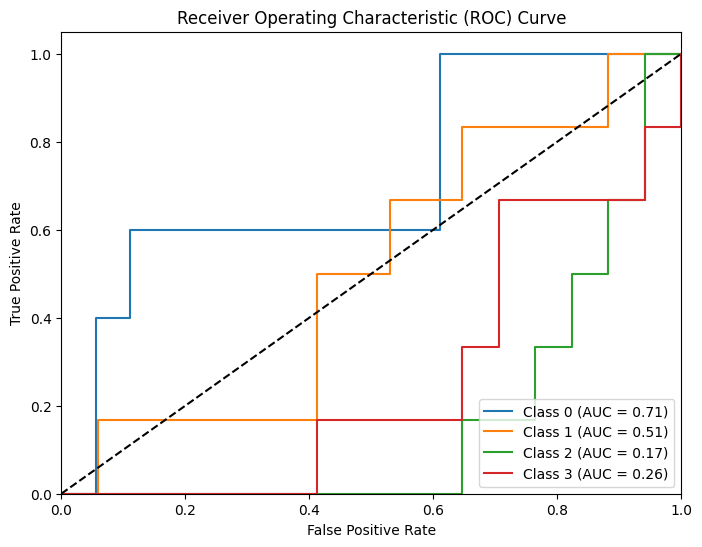

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

# Get predictions for the test set
y_pred_probs = model.predict(validation_generator)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = validation_generator.classes  # Get true labels

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred_probs.shape[1]  # Number of classes

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(to_categorical(y_true)[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

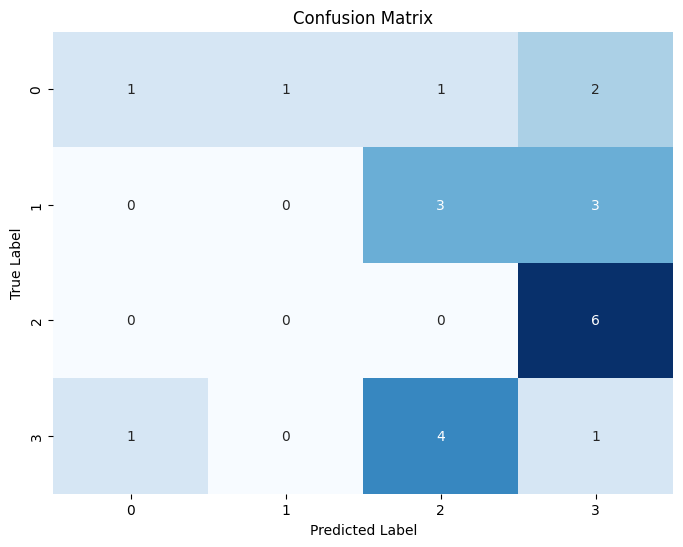

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()